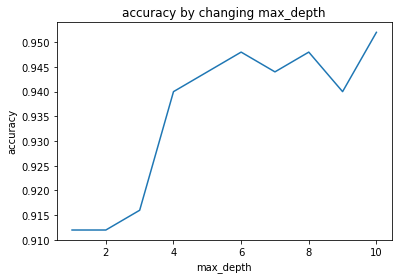

In [3]:
# 결정 트리의 파라미터 max_depth
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

X, y = make_classification(n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

depth_list = [i for i in range(1, 11)]
accuracy = []

for max_depth in depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

plt.plot(depth_list, accuracy)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("accuracy by changing max_depth")
plt.show()

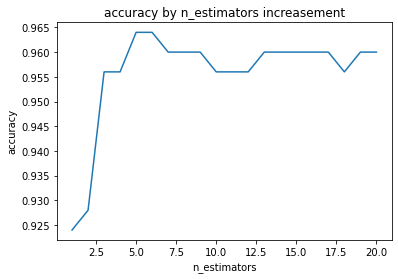

In [7]:
# 랜덤 포레스트의 파라미터 n_estimators
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [i for i in range(1, 21)]
accuracy = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

plt.plot(n_estimators_list, accuracy)
plt.title("accuracy by n_estimators increasement")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

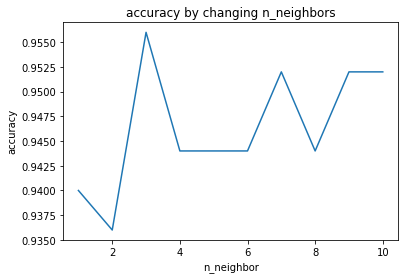

In [10]:
# k-NN의 파라미터 n_neighbors
from sklearn.neighbors import KNeighborsClassifier

k_list = [i for i in range(1, 11)]
accuracy = []

for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

plt.plot(k_list, accuracy)
plt.xlabel("n_neighbor")
plt.ylabel("accuracy")
plt.title("accuracy by changing n_neighbors")
plt.show()

__튜닝자동화__

In [17]:
# 그리드검색
'''
조정하려는 하이퍼파라미터 값의 후보를 명시적으로 복수 지정하여 파라미터셋을 만들고,
모델의 평가를 반복하여 최적의 파라미터 셋을 만드는데 사용하는 방법
'''

import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

# 파라미터 값의 후보 설정
model_params_set_grid = {SVC(): {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [10 ** i for i in range(-5, 5)],
    "decision_function_shape": ["ovr", "ovo"],
    "random_state": [42]
}}

max_score = 0
best_param = None

for model, param in model_params_set_grid.items():
    clf = GridSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")
    if max_score < score:
        max_score = score
        betst_model = model.__class__.__name__
        best_param = clf.best_params_

print(f"Parameter: {best_param}")
print(f"Best score: {max_score}")

svm = SVC()
svm.fit(train_X, train_y)
print()
print("조정 없음")
print(svm.score(test_X, test_y))

Parameter: {'C': 10, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 42}
Best score: 0.9888888888888889

조정 없음
0.9866666666666667


In [19]:
# 랜덤 검색
'''
파라미터가 취할 수 있는 값의 범위를 지정하고, 확률로 결정된 파라미터셋을 사용하여 모델평가를 반복
(그리드 검색에서는 값의 후보를 지정한 뒤 파라미터를 조정했음) 값의 범위를 지정하는 것은 파라미터의 확률 함수를 지정하는 것
'''

from sklearn.model_selection import RandomizedSearchCV

data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

model_param_set_random = {SVC(): {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": scipy.stats.uniform(0.00001, 1000),
    "decision_function_shape": ["ovr", "ovo"],
    "random_state": scipy.stats.randint(0, 100)
    }}

max_score = 0
best_param = None

for model, param in model_param_set_random.items():
    clf = RandomizedSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")
    if max_score < score:
        max_score = score
        best_param = clf.best_params_

print(f"Parameter: {best_param}")
print(f"Best score: {max_score}")

svm = SVC()
svm.fit(train_X, train_y)
print("조정 없음")
print(svm.score(test_X, test_y))

Parameter: {'C': 842.0043383574132, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'random_state': 75}
Best score: 0.9888888888888889
조정 없음
0.9866666666666667
